<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


With the t-test we are considering averages/population parameter of one group against another group. We ignore the individual variability within groups.
<br>
A feature of test that measure group differences they ignore individual differences.
<br>
There is a need for a set of methods that can highlight and capture that individual variability and reveal whether there are some important relationships betweem individual variability and some other variable.
<br>
That is the idea of ***corrleation***
<br>
To begin to compute corrleation we need data that are somehow paried. Doesn’t need to be exactly the same but related in some meaningful way.
<br>
You could have two test groups with different labels and one group could be students test scores in History and the other group could be student test scores in Computer Science.
<br>


**Correlation: definition and description**
<br>
A correlation analysis computes a corrleation coefficient(termed"r")
<br>
The correlation coefficient varies between -1 and +1. -1 means a perfect inverse relationship, 0 means no relationship, and +1 means a perfect positive relationship.
<br>
The correlation coefficient itself is a continous measure of correlation strength. A corresponding p-value must be computed to interpret its statistical significance

The P-Value for the correlation coefficient is related to both strength of the relationship and tightness of the relationships best fit line and also related to the sample points
<br>
*You can have a modest or even weak correlation but if you have a large sample size the p-value is going to be small*

**Correlation vs Causation**
<br>
correlation merely shows a relationship, it does not reveal or imply causality.
<br>
Causality can be demonstrated by experimental manipulations

**Covariance vs. Correlation**
<br>
Covariance is a single number that measures linear relationships between variables
<br>
To compute a correlation you first have to compute the covariance and then you normalize the covariance
<br>
Correlation is just covariance that has been sutibly scaled. Correlation is normalized to be independent of the data scale.
<br>


```
c = 1/n-1 * sum(x[i]-np.mean(x))(y[i]-np.mean(y))
```
<br>

*very similar to element wise multiplication*
```
r = sum(x-np.mean(x))(y-np.mean(y))/np.sqrt((sum(x-np.mean(x))**2) * (sum(y-np.mean(y))**2) )
```
<br>


P-Value of the Corr Coef
<br>
Statistical significance is computed from a t value that is based on the strength of the correlation and the number of data points


```
tn-2 = r(np.sqrt(n-2))/np.sqrt(1-r**2)
```



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

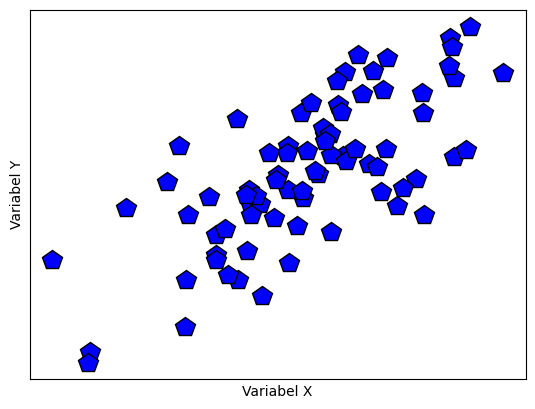

In [3]:
#Stimulate data

N = 77

#generate correlated data
x = np.random.randn(N)
y = x + np.random.randn(N) #increase/decrease the noise to effect corr

#Plot the data
plt.plot(x,y,'kp', markerfacecolor='b', markersize=15)
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.xticks([])
plt.yticks([])

plt.show()

In [4]:
#Compute covariance

meanX = np.mean(x)
meanY = np.mean(y)

###loop the method

#initalize covar var
covar1 = 0

for i in range(N):
  covar1 = covar1 + (x[i]- meanX) * (y[i]- meanY)

#normalization
covar1 = covar1/(N-1)


#Linear Alegbra method
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent)/(N-1)

#Python Method
covar3 = np.cov(np.vstack((x,y)))

print(covar1, covar2, covar3)

1.0716374991279078 1.0716374991279078 [[1.0389734  1.0716375 ]
 [1.0716375  2.12450414]]


In [5]:
#Correlation

corr_num = sum( (x-meanX) * (y-meanY) )
corr_den = sum((x-meanX)**2 * sum((y-meanY)**2 ))
corr1 = corr_num/np.sqrt(corr_den)


#Python Method
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1)
print(corr2)

0.7213016029480329
[[1.        0.7213016]
 [0.7213016 1.       ]]


You can compute the covariance of two variables and if the variables have a mean of 0 and a variance of 1then the covar == corrcoef

In [6]:
xn = stats.zscore(x,ddof=1)
yn = stats.zscore(y, ddof=1)

corr3 = np.dot(xn,yn)/(N-1)

print(corr3)

0.7213016029480329


In [7]:
#find the statistical significance
r,p = stats.pearsonr(x,y)

In [8]:
print(r)
print(p)

0.7213016029480332
1.370776466178809e-13


**Correlation Matrix**
<br>
A symmetric matrix, meaning that all the elements above the diagonal and to the right are going to mirror exactly the elements below and to the left
<br>


In [9]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.3 MB/s eta 0:00:00


In [10]:
import pingouin as pg

In [11]:
#Partial Corr


#row corr
rmg = .7
rsg = .8
rms = .9

#Partial Correlations
rho_mg_s = (rmg - rsg*rms)/ (np.sqrt(1-rsg**2)*np.sqrt(1-rms**2))
rho_sg_m = (rsg - rmg*rms)/ (np.sqrt(1-rmg**2)*np.sqrt(1-rms**2))

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [12]:
#Partial Correlation with a lot of data points

N = 80

#correlated datasets
x1 = np.linspace(1,10,N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x1 +  np.random.randn(N)

#convert into a dataframe
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

#compute the corr matrix
cormatR = df.corr()
print(cormatR)

#print out one value
print('')
print(cormatR.values[1,0])

#partial corr
pc = pg.partial_corr(df,x='x3', y='x2', covar='x1')

print('')
print(pc)

          x1        x2        x3
x1  1.000000  0.942997  0.942047
x2  0.942997  1.000000  0.898244
x3  0.942047  0.898244  1.000000

0.9429965268766625

          n         r         CI95%     p-val
pearson  80  0.088644  [-0.14, 0.3]  0.437244


***Pearson correlation can over or under repersent relationships if they contain no linearities or outliers***


**Nonparametric Correlation: Spearman Correlation**
<br>
Spearman's Rho test for monotonic relationship, regardless of whether the relationship is linear or nonlinear
<br>
*Monotonic relationship test for increasing or decreasing numbers, regardless of the spacing between the numbers*

**How to compute the Spearmam Correlation**
* Step 1: Transform both variables to rank - **there are no outliers with rank**
* Step 2: Compute the Pearson correlation coefficients on ranks
<br>

**this is why Spearman correlation is robust to outliers, and scalaing effects**
<br>
* P-Value: Same as for 'regular' Pearson Coefficient


**Fisher-Z transform for correlation**
It is not possible to have a correlation coefficient less than -1 or greater than 1 and that is by design, because it facilitates interpretation and that interpretation is independent of the data.
<br>
Depending on the use cases on those corr coef you may need to apply a transformation. That transformation is called *Fisher-Z*

***Why do correlations need a transformation**
<br>
The correlation coefficient are uniformly distributed and are bound by -1/+1
<br>
However there are analytical methods that assume your data are drawn from a normal gaussian distribution
<br>
If the end goal is just interpretation then it is not an issue but if you will be doing secondary analysis then you would need to transformations done on the correlation coefficients in to a guassian scale.

**Fisher-Z**

```
Zr = .5*logn(1+r/1-r)
```

The F-Z doesnt have a strong effect on most of the values until you get closer to the respective -1/+1 and visually you would see its strecthing out the tails

In [13]:
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])

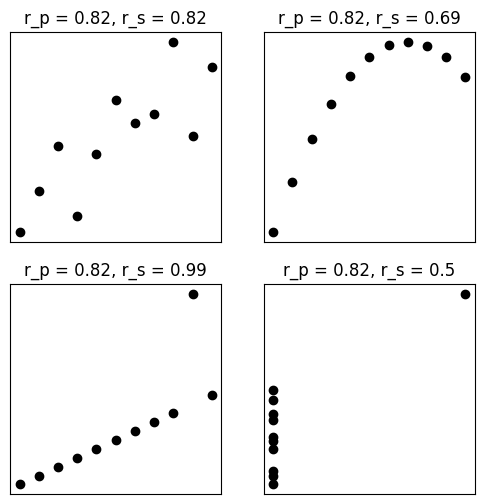

In [18]:
#plot and compute correlations
fig, ax = plt.subplots(2,2, figsize=(6,6))
ax = ax.ravel()

for i in range(4):
  ax[i].plot(anscombe[:, i*2], anscombe[:, i*2+1], 'ko')
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  corr_p = stats.pearsonr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
  corr_s = stats.spearmanr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
  ax[i].set_title('r_p = %g, r_s = %g'%(np.round(corr_p*100)/100, np.round(corr_s*100)/100 ))

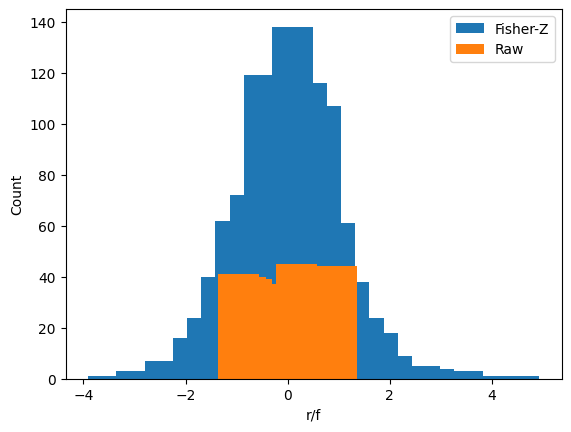

In [24]:
##Fisher Z-transform

#stimulate correlation coefficients
N = 1000
r = 2 * np.random.rand(N) - 1

#Fisher-Z
fz = np.arctanh(r)

#overlay rhe Fisher-Z
y,x = np.histogram(fz,30)
x = (x[1:] + x[0:-1])/2
plt.bar(x,y)

#raw correlations
y,x = np.histogram(r,30)
x = (x[1:] + x[0:-1])/2
plt.bar(x,y)

plt.xlabel('r/f')
plt.ylabel('Count')
plt.legend(('Fisher-Z', 'Raw'))

plt.show()

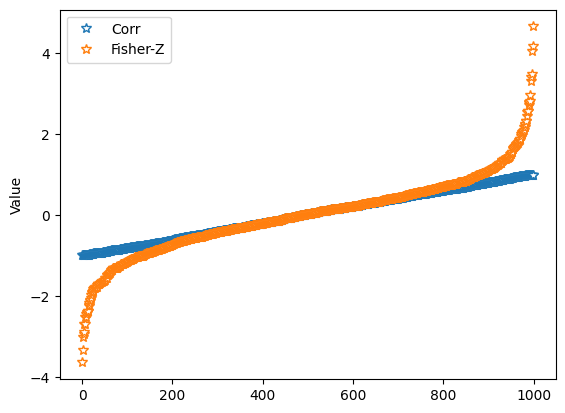

In [26]:
plt.plot(range(N), np.sort(r), '*', markerfacecolor='w', markersize=7)
plt.plot(range(N), np.sort(fz), '*', markerfacecolor='w', markersize=7)
plt.ylabel('Value')
plt.legend(('Corr', 'Fisher-Z'))

plt.show()

**Kendall's Correlation**
<br>
Used for ordinal data(numerical meaningful order, but no fixed relationship across the levels)
<br>
*How It works*
<br>
Transform the data to rank concordances(relative signs across the values per variable)
<br>
***Kendall tau-b*** has an adjustment for ties, and is most often used
<br>
Interpretation is identical to Pearson and Spearman